ECharts是一款基于JavaScript的数据可视化图表库，提供直观，生动，可交互，可个性化定制的数据可视化图表。ECharts最初由百度团队开源

- https://echarts.apache.org/examples/zh/index.html#chart-type-sunburst echarts官网

PyEcharts = Python + Echarts
- Echarts 是一个由百度开源的数据可视化工具，凭借着良好的交互性，精巧的图表设计，得到了众多开发者的认可，而 Python 就不用多说了。
- https://pyecharts.org/#/zh-cn/intro pyecharts官方文档 中文
- https://gallery.pyecharts.org pyecharts图例展示

## 注意注意 !!  
这个学习的模块不要求你们会写, 但要求你们能看懂, 如果有用到的时候 直接抄!!!!

In [23]:
# 举例子
# 注意 事先要 pip install  pyecharts 如果失败 请用豆瓣源进行安装 
from pyecharts import options as opts
from pyecharts.charts import Bar  # 或者 from pyecharts.charts import  * 

from pyecharts.faker import Faker#这是用来产生伪数据的包
from pyecharts.globals import ThemeType  # 展示主题


In [24]:
# 简单的案例  

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
bar.render()

'C:\\Users\\1\\Desktop\\新数据分析讲义\\第十五章 数据可视化高阶  pyecharts(1)\\render.html'

In [25]:
bar = Bar() # 首先生成一个对象  对象有各种方法或者属性进行调用 
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
bar.render_notebook()#用来在notebook中展示图形，使用render则会直接保存为html文件

全局配置项
- 何为全局配置项？

- set_global_opts非常重要的修饰函数，负责图形大部分整体的修饰。

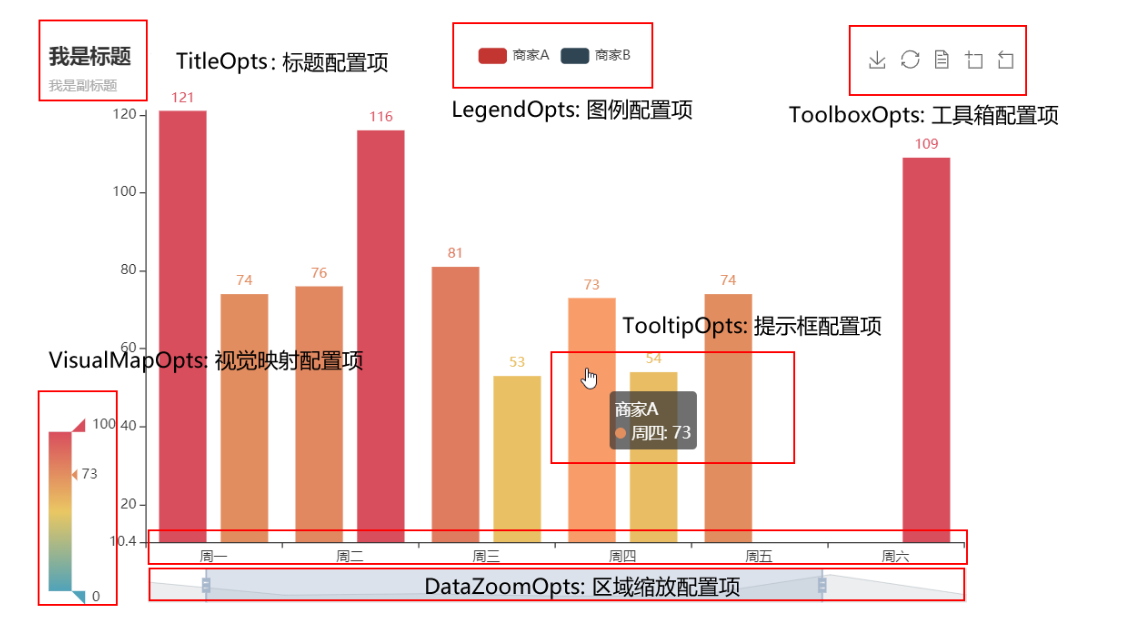

In [27]:
# 第二种写法 生成一个对象 然后进行进行调用
# https://gallery.pyecharts.org/#/Bar/bar_base
b = Bar(init_opts=opts.InitOpts(width="620px", height="300px",page_title =  "这是啥",theme=ThemeType.ESSOS ))
b.add_xaxis(Faker.choose())
b.add_yaxis("商家A", Faker.values())
b.add_yaxis("商家B", Faker.values())
# TitleOpts对应class TitleOpts中的类名，title_opts需要把TitleOpts中的title 小写
b.set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例",
                                            subtitle="我是副标题",
                                            title_link='https://www.baidu.com',

                                            ),
                  legend_opts=opts.LegendOpts(selected_mode=  True,
                                              pos_left = 'center' ,
                                              pos_top = 20,
                                              legend_icon = 'circle',
                                              textstyle_opts = opts.TextStyleOpts(
                                                                              font_style = 'italic'
)),
                  toolbox_opts = opts.ToolboxOpts(orient = 'vertical',
                                                  feature = opts.ToolBoxFeatureOpts(save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(type_ = 'jpeg'
                                                  ))),
                  tooltip_opts = opts.TooltipOpts(trigger = 'axis',
                                                  axis_pointer_type = 'line',
                                                  border_color = 'green',
                                                  border_width = 3

                                                 ),
                  
                  visualmap_opts = opts.VisualMapOpts(is_show = True,
                                                      type_ = 'color',
                                                      orient ='va'
                                                     ),
                  datazoom_opts = opts.DataZoomOpts(type_ = 'inside',)

                  
                  

        
    )


b.render_notebook()



系列配置项
- set_series_opts负责很多系列配置项的定义，比如 LabelOpts；MarkPointOpts；AreaStyleOpts

In [3]:
bar = Line(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(Faker.choose())
bar.add_yaxis(
    "商家A",
    Faker.values(),
)

bar.set_series_opts(
    label_opts=opts.LabelOpts(color='green'),  #去掉bar的数字标识
    markpoint_opts=opts.MarkPointOpts(data=[
        opts.MarkPointItem(
            name='最大值',
            type_='max',
        ),
        opts.MarkPointItem(
            name='最小值',
            type_='min',
        )
    ]),
    linestyle_opts=opts.LineStyleOpts(
        color='#FFA500',
        width=4,
        type_='dotted',
    ))

bar.render_notebook()

In [4]:
# 基础柱状图
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker



b = Bar()
b.add_xaxis(Faker.choose())
b.add_yaxis("商家A", Faker.values())
b.add_yaxis("商家B", Faker.values())
b.set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
b.render_notebook()


In [5]:
# 区域缩放 

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


b = Bar()
b.add_xaxis(Faker.days_attrs)
b.add_yaxis("商家A", Faker.days_values, color=Faker.rand_color())
b.set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-DataZoom（slider+inside）"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],)
b.render_notebook()


In [6]:
# Bar - Bar_markline_custom
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


b= Bar()
b.add_xaxis(Faker.choose())
b.add_yaxis("商家A", Faker.values())
b.add_yaxis("商家B", Faker.values())
b.set_global_opts(title_opts=opts.TitleOpts(title="Bar-MarkLine（自定义）"))
b.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(y=50, name="yAxis=50")]
        ),
    )
b.render_notebook()



In [28]:
# Bar - Bar_histogram 

# category_gap参数起作用
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values(), category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-直方图"))
    .render_notebook()
)
c

In [8]:
# Bar - Bar_markpoint_custom  标记点
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

x, y = Faker.choose(), Faker.values()
c = (
    Bar()
    .add_xaxis(x)
    .add_yaxis(
        "商家A",
        y,
        markpoint_opts=opts.MarkPointOpts(
            data=[opts.MarkPointItem(name="自定义标记点", coord=[x[2], y[2]], value=y[2])]
        ),
    )
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-MarkPoint（自定义）"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .render_notebook()
)
c

In [9]:
# Bar - Bar_reversal_axis

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .reversal_axis()  #  坐标轴反转
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-翻转 XY 轴"))
    .render_notebook()
)

c


In [10]:
# Bar - Bar_is_selected

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values(), is_selected=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-默认取消显示某 Series"))
    .render_notebook()
)

c


In [11]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-MarkLine（指定类型）"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="min", name="最小值"),
                opts.MarkLineItem(type_="max", name="最大值"),
                opts.MarkLineItem(type_="average", name="平均值"),
            ]
        ),
    )
)

c.render_notebook()

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-MarkPoint（指定类型）"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                opts.MarkPointItem(type_="average", name="平均值"),
            ]
        ),
    )
    .render_notebook()
)

c

In [13]:
# Bar - Bar_yaxis_formatter
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-Y 轴 formatter"),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} /月")),
    )
    .render_notebook()
)

c


In [14]:
# Bar - Bar_xyaxis_name

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-XY 轴名称"),
        yaxis_opts=opts.AxisOpts(name="我是 Y 轴"),
        xaxis_opts=opts.AxisOpts(name="我是 X 轴"),
    )
    .render_notebook()
)
c


In [15]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values(), stack="stack1")  # stack1 表示商家 A
    .add_yaxis("商家B", Faker.values(), stack="stack1")
    .add_yaxis("商家C", Faker.values())
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-堆叠数据（部分）"))
    .render_notebook()
)

c


In [53]:
import pyecharts.options as opts
from pyecharts.charts import Bar, Line


x_data = ["1月", "2月", "3月", "4月", "5月", "6月",
          "7月", "8月", "9月", "10月", "11月", "12月"]

bar = (
    Bar(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="蒸发量",
        y_axis=[
            2.0,
            4.9,
            7.0,
            23.2,
            25.6,
            76.7,
            135.6,
            162.2,
            32.6,
            20.0,
            6.4,
            3.3,
        ],
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="降水量",
        y_axis=[
            2.6,
            5.9,
            9.0,
            26.4,
            28.7,
            70.7,
            175.6,
            182.2,
            48.7,
            18.8,
            6.0,
            2.3,
        ],
        label_opts=opts.LabelOpts(is_show=False),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="温度",
            type_="value",
            min_=0,
            max_=25,
            interval=5,
            axislabel_opts=opts.LabelOpts(formatter="{value} °C"),
        )
    )
    .set_global_opts(
        # 提示框设置
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(
                is_show=True, type_="shadow"),
        ),
        yaxis_opts=opts.AxisOpts(
            name="水量",
            type_="value",
            min_=0,
            max_=250,
            interval=50,
            axislabel_opts=opts.LabelOpts(formatter="{value} ml"),
        ),
    )
)

# 折线图 

line = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="平均温度",
        yaxis_index=1,
        y_axis=[2.0, 2.2, 3.3, 4.5, 6.3, 10.2,
                20.3, 23.4, 23.0, 16.5, 12.0, 6.2],
        label_opts=opts.LabelOpts(is_show=True),
    )
)

bar.overlap(line).render_notebook()

In [17]:
# Bar - Bar_with_brush
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker


c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-Brush示例", subtitle="我是副标题"),
        brush_opts=opts.BrushOpts(),
    )
    .render_notebook()
)

c


In [18]:
# Bar - Bar_rotate_xaxis_label
from pyecharts import options as opts
from pyecharts.charts import Bar

c = (
    Bar()
    .add_xaxis(
        [
            "名字很长的X轴标签1",
            "名字很长的X轴标签2",
            "名字很长的X轴标签3",
            "名字很长的X轴标签4",
            "名字很长的X轴标签5",
            "名字很长的X轴标签6",
        ]
    )
    .add_yaxis("商家A", [10, 20, 30, 40, 50, 40])
    .add_yaxis("商家B", [20, 10, 40, 30, 40, 50])
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="Bar-旋转X轴标签", subtitle="解决标签名字过长的问题"),
    )
    .render_notebook()
)

c


In [29]:
#  水球图 

from pyecharts import options as opts
from pyecharts.charts import Liquid

c = (
    Liquid()
    .add("lq", [0.6, 0.7])  #  0.6 表示数字 0.7表示水的淹没范围 
    .set_global_opts(title_opts=opts.TitleOpts(title="Liquid-基本示例"))
    .render_notebook()
)

c


In [31]:
from pyecharts import options as opts
from pyecharts.charts import Liquid

c = (
    Liquid()
    .add("lq", [0.3, 0.7], is_outline_show=False, shape='roundRect')
    .set_global_opts(title_opts=opts.TitleOpts(title="Liquid-Shape-arrow"))
    .render_notebook()
)


c

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Liquid

c = (
    Liquid()
    .add("lq", [0.6, 0.6], is_outline_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="Liquid-无边框"))
    .render_notebook()
)


c

In [34]:
#  漏斗图 

from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add("商品", [list(z) for z in zip(Faker.choose(), Faker.values())])
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel-基本示例"))
    .render_notebook()
)

c


In [36]:
# Funnel - Funnel_label_inside

from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker


c = (
    Funnel()
    .add(
        "商品",
        [list(z) for z in zip(Faker.choose(), Faker.values())],
        label_opts=opts.LabelOpts(position="inside"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel-Label（inside)"))
    .render_notebook()
)


c


In [37]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add(
        "商品",
        [list(z) for z in zip(Faker.choose(), Faker.values())],
        sort_="ascending",
        label_opts=opts.LabelOpts(position="inside"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Funnel-Sort（ascending）"))
    .render_notebook()
)

c
